## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [3]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [5]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [7]:
columns= ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
diabetes_data[columns]= diabetes_data[columns].replace('0',np.nan)
diabetes_data.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


**<font color='teal'> Plot histograms of each column. </font>**

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


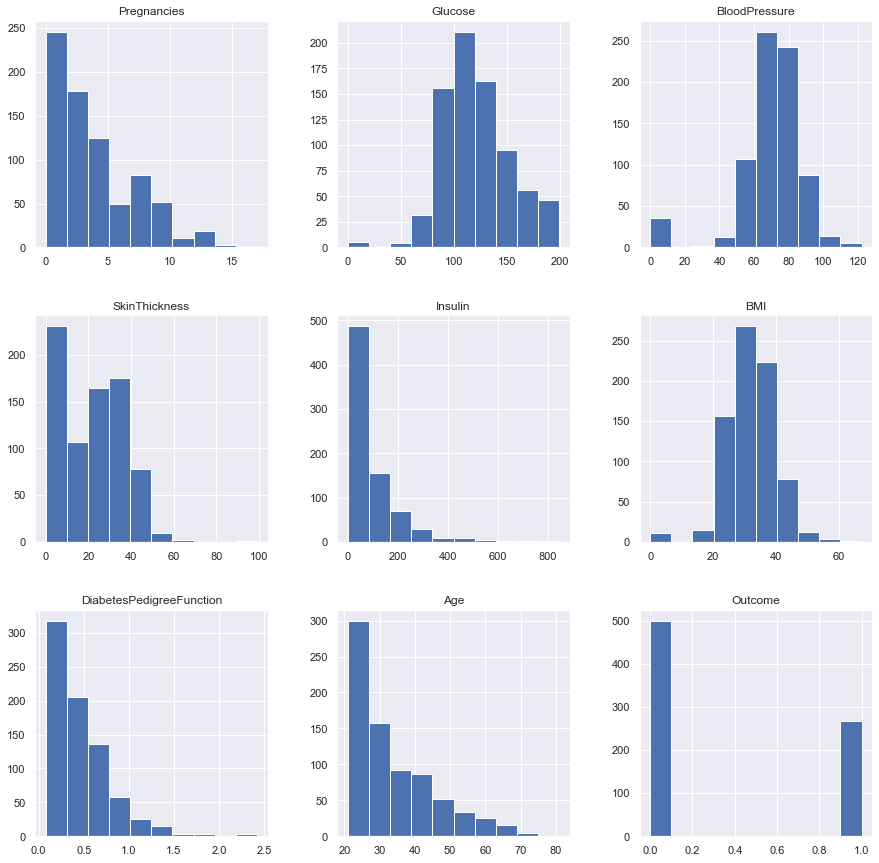

In [10]:
fig = plt.figure(figsize = (15,15))
ax= fig.gca()
diabetes_data.hist(ax=ax)
plt.show()

#### Replace the zeros with mean and median values.

In [11]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


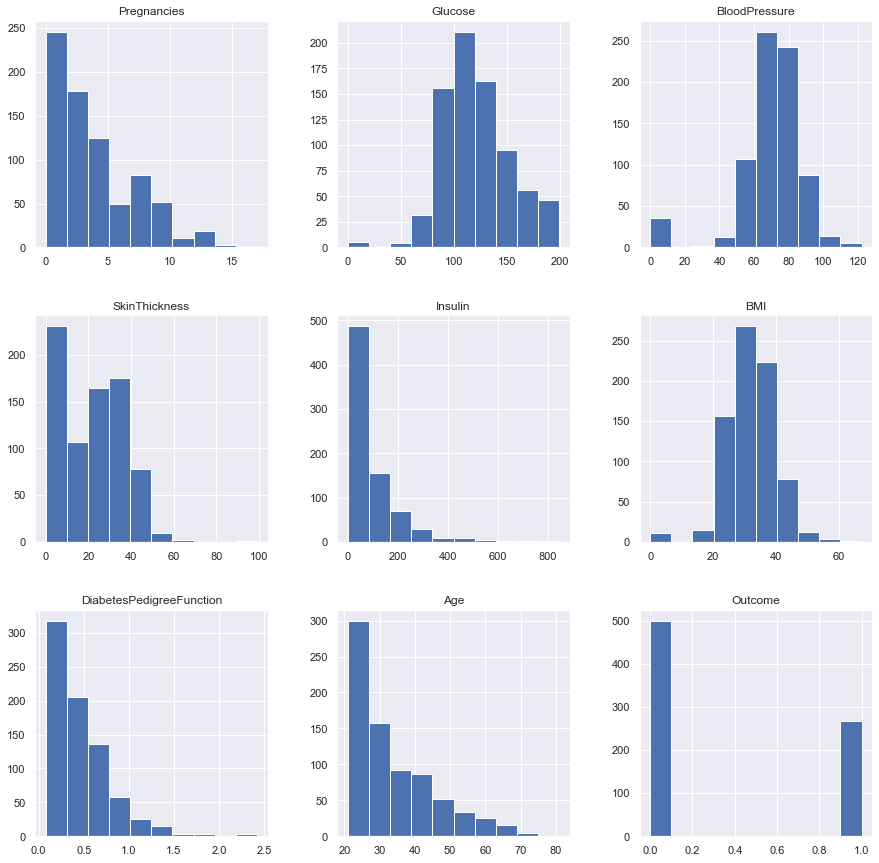

In [12]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
diabetes_data.hist(ax=ax)
plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


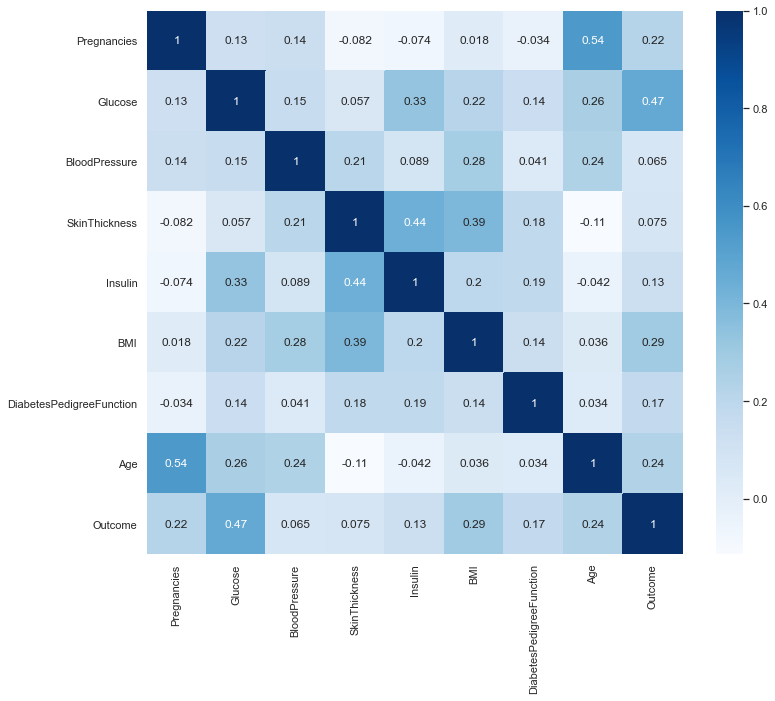

In [13]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [16]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
diabetes_temp = diabetes_data.drop(columns= ['Outcome'])
diabetes_scaler = scaler.fit_transform(diabetes_temp)
print(diabetes_scaler)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [17]:
X=diabetes_scaler
y=diabetes_data['Outcome']

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.7,random_state = 8)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [ ]:
#did that above so i could define my x and y to procede 

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [26]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,17):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [27]:
for i in range(0,16):
    print("train_scores[",i,"] =", train_scores[i], '  test_scores[',i,'] = ',test_scores[i])

train_scores[ 0 ] = 1.0   test_scores[ 0 ] =  0.7063197026022305
train_scores[ 1 ] = 0.8347826086956521   test_scores[ 1 ] =  0.70817843866171
train_scores[ 2 ] = 0.8478260869565217   test_scores[ 2 ] =  0.7174721189591078
train_scores[ 3 ] = 0.7695652173913043   test_scores[ 3 ] =  0.7379182156133829
train_scores[ 4 ] = 0.7869565217391304   test_scores[ 4 ] =  0.7286245353159851
train_scores[ 5 ] = 0.782608695652174   test_scores[ 5 ] =  0.741635687732342
train_scores[ 6 ] = 0.7956521739130434   test_scores[ 6 ] =  0.7397769516728625
train_scores[ 7 ] = 0.7739130434782608   test_scores[ 7 ] =  0.7323420074349443
train_scores[ 8 ] = 0.7913043478260869   test_scores[ 8 ] =  0.7379182156133829
train_scores[ 9 ] = 0.782608695652174   test_scores[ 9 ] =  0.7397769516728625
train_scores[ 10 ] = 0.7565217391304347   test_scores[ 10 ] =  0.7490706319702602
train_scores[ 11 ] = 0.7652173913043478   test_scores[ 11 ] =  0.7434944237918215
train_scores[ 12 ] = 0.7695652173913043   test_scores[ 1

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [29]:
import functools 
train_scores_max=np.amax(train_scores)
n = np.where(train_scores == train_scores_max)
res = functools.reduce(lambda sub, ele: sub * 10 + ele, n)
res=res+1

print('The max traning scores is =',train_scores_max, 'when there is ',res, 'neighbors nearby')

The max traning scores is = 1.0 when there is  [1] neighbors nearby


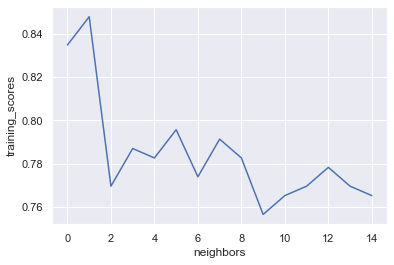

In [31]:
neighbor=15
train_scores_plot=[]
for i in range(1,16):
    train_scores_plot.append(train_scores[i])
plt.plot(range(0,neighbor),train_scores_plot)
plt.xlabel('neighbors')
plt.ylabel('training_scores')
plt.show()

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [30]:
import functools 
test_scores_max=np.amax(test_scores)
n = np.where(test_scores == test_scores_max)
res = functools.reduce(lambda sub, ele: sub * 10 + ele, n)
res=res+1

print('The max test scores is =',test_scores_max, 'when there is ',res, 'neighbors nearby')

The max test scores is = 0.7565055762081785 when there is  [14 16] neighbors nearby


Plot the train and test model performance by number of neighbors.

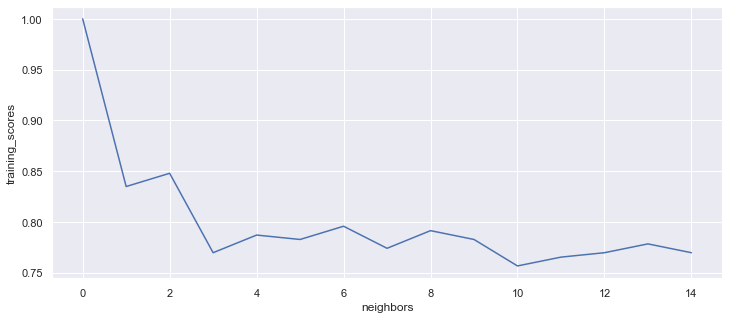

In [34]:
plt.figure(figsize=(12,5))
neighbor=15
train_scores_plot=[]
for i in range(0,15):
    train_scores_plot.append(train_scores[i])
plt.plot(range(0,neighbor),train_scores_plot)
plt.xlabel('neighbors')
plt.ylabel('training_scores')
plt.show()

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

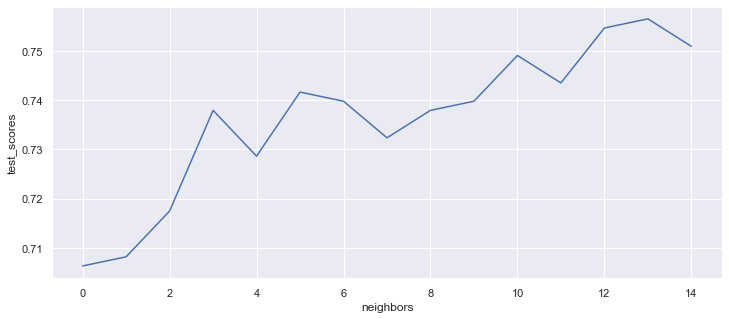

In [35]:
plt.figure(figsize=(12,5))
neighbor=15
test_scores_plot=[]
for i in range(0,15):
    test_scores_plot.append(test_scores[i])
plt.plot(range(0,neighbor),test_scores_plot)
plt.xlabel('neighbors')
plt.ylabel('test_scores')
plt.show()



In [37]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

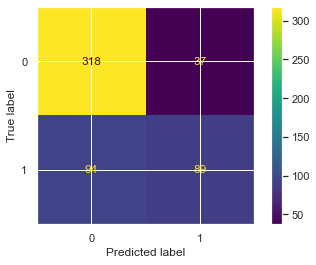

In [38]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn,X_test,y_test)
plt.show()

**<font color='teal'> Print the classification report </font>**

In [39]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       355
           1       0.71      0.49      0.58       183

    accuracy                           0.76       538
   macro avg       0.74      0.69      0.70       538
weighted avg       0.75      0.76      0.74       538



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [40]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [41]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7669892199303965
Best Parameters: {'n_neighbors': 17}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [42]:
from sklearn.ensemble import RandomForestClassifier

RFModel = RandomForestClassifier()
param_grid = {'n_estimators': np.arange(1,50)}
RFModel_cv = GridSearchCV(RFModel,param_grid,cv=5)
RFModel_cv.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [44]:
print("Best Score:" + str(RFModel_cv.best_score_))
print("Best Parameters: " + str(RFModel_cv.best_params_))

Best Score:0.7735251676428148
Best Parameters: {'n_estimators': 47}
